# Logistic Regression with Regularization
The data you’re going to be working with is from the Wine Quality Dataset in the UCI Machine Learning Repository. We’re looking at the red wine data in particular and while the original dataset has a 1-10 rating for each wine, we’ve made it a classification problem with a wine quality of good (>5 rating) or bad (<=5 rating). The goals of this project are to:

- implement different logistic regression classifiers
- find the best ridge-regularized classifier using hyperparameter tuning
- implement a tuned lasso-regularized feature selection method

## Data description

11 input variables (based on physicochemical tests): ‘fixed acidity’, ‘volatile acidity’, ‘citric acid’, ‘residual sugar’,’chlorides’, ‘free sulfur dioxide’, ‘total sulfur dioxide’, ‘density’, ‘pH’, ‘sulphates’ and ‘alcohol’.

An output variable, ‘quality’ (0 for bad and 1 for good)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_quality.csv')
print(df.columns)
y = df['quality']
features = df.drop(columns = ['quality'])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [11]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
## 1. Data transformation
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(features)
print(X)

# Alternatively...
# standard_scaler_fit = StandardScaler().fit(features)
# X = standard_scaler_fit.transform(features)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [13]:
## 2. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

## Model with regularisation

In [17]:
## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression
clf_no_reg = LogisticRegression(penalty = 'none') # must explicitly set penalty because defualt uses regularisation
clf_no_reg.fit(X_train, y_train)

LogisticRegression(penalty='none')

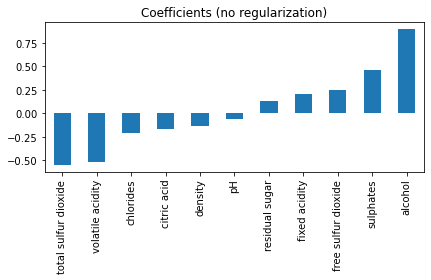

<Figure size 432x288 with 0 Axes>

In [18]:
## 4. Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

In [20]:
## 5. Training and test performance
from sklearn.metrics import f1_score
print('The training f1 score for logistic regression without regularisation is: %f' % (f1_score(y_train, clf_no_reg.predict(X_train))))
print('The  test  f1  score for  logistic regression without regularisation is: %f' % (f1_score(y_test, clf_no_reg.predict(X_test))))

The training f1 score for logistic regression without regularisation is: 0.772760
The  test  f1  score for  logistic regression without regularisation is: 0.726667


## Hyperparamtere tuning for L2 regularisation

In [22]:
## 6. Default Implementation (L2-regularized!)
clf_default = LogisticRegression()
clf_default.fit(X_train, y_train)

## 7. Ridge Scores
print('The training f1 score for logistic regression with Ridge regularisation is: %f' % (f1_score(y_train, clf_default.predict(X_train))))
print('The  test  f1  score for  logistic regression with Ridge regularisation is: %f' % (f1_score(y_test, clf_default.predict(X_test))))

The training f1 score for logistic regression with Ridge regularisation is: 0.772760
The  test  f1  score for  logistic regression wiht Ridge regularisation is: 0.726667


The score for logistic regression with and without regularisation is the same. This must mean that the hyperparameter controlling the degree of regularisation isn't sufficiently tuned. In other words, the contraint boundary for the Ridge regularisation possesses the minimum of the loss function without regularisation.

In [24]:
## 8. Coarse-grained hyperparameter tuning
C_array = [0.0001, 0.001, 0.01, 0.1, 1]
models = [LogisticRegression(C=c).fit(X_train,y_train) for c in C_array]
training_array = [f1_score(y_train,model.predict(X_train)) for model in models]
test_array = [f1_score(y_test,model.predict(X_test)) for model in models]

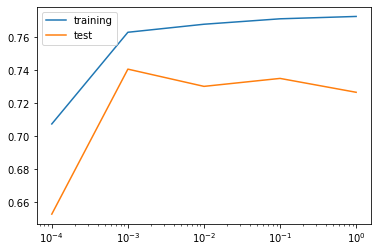

<Figure size 432x288 with 0 Axes>

In [26]:
## 9. Plot training and test scores as a function of C
plt.plot(C_array,training_array)
plt.plot(C_array,test_array)
plt.xscale('log')
plt.legend(['training','test'])
plt.show()
plt.clf()

In [35]:
## 10. Making a parameter grid for GridSearchCV - time for a finer grid search
C_array = np.logspace(-4,-2,100)
tuning_C = {'C':C_array}

In [38]:
## 11. Implementing GridSearchCV with l2 penalty
from sklearn.model_selection import GridSearchCV
grid_search_model = GridSearchCV(LogisticRegression(),
                                tuning_C,
                                scoring='f1',
                                cv=5)
grid_search_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.0001    , 0.00010476, 0.00010975, 0.00011498, 0.00012045,
       0.00012619, 0.00013219, 0.00013849, 0.00014508, 0.00015199,
       0.00015923, 0.00016681, 0.00017475, 0.00018307, 0.00019179,
       0.00020092, 0.00021049, 0.00022051, 0.00023101, 0.00024201,
       0.00025354, 0.00026561, 0.00027826, 0.00029151, 0.00030539,
       0.00031...
       0.00205651, 0.00215443, 0.00225702, 0.00236449, 0.00247708,
       0.00259502, 0.00271859, 0.00284804, 0.00298365, 0.00312572,
       0.00327455, 0.00343047, 0.00359381, 0.00376494, 0.00394421,
       0.00413201, 0.00432876, 0.00453488, 0.00475081, 0.00497702,
       0.00521401, 0.00546228, 0.00572237, 0.00599484, 0.00628029,
       0.00657933, 0.00689261, 0.00722081, 0.00756463, 0.00792483,
       0.00830218, 0.00869749, 0.00911163, 0.00954548, 0.01      ])},
             scoring='f1')

In [39]:
## 12. Optimal C value and the score corresponding to it
print(grid_search_model.best_params_)
print(grid_search_model.best_score_)

{'C': 0.0019630406500402726}
0.7723336222647887


In [42]:
## 13. Validating the "best classifier"
clf_best_ridge = LogisticRegression(C=grid_search_model.best_params_['C'])
clf_best_ridge.fit(X_train,y_train)
print(f1_score(y_test, clf_best_ridge.predict(X_test)))

0.7407407407407408


## Feature selection using L1 regularisation

In [44]:
## 14. Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
clf_l1 = LogisticRegressionCV(Cs=np.logspace(-2,2,100),
                             cv=5,
                             penalty='l1',
                             solver='liblinear',
                             scoring='f1')
clf_l1.fit(X,y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

In [45]:
## 15. Optimal C value and corresponding coefficients
print(clf_l1.C_)
print(clf_l1.coef_)

[0.25950242]
[[ 0.1160558  -0.5561419  -0.17227619  0.03123535 -0.17341066  0.20068315
  -0.50605448  0.         -0.07066229  0.43225111  0.94097542]]


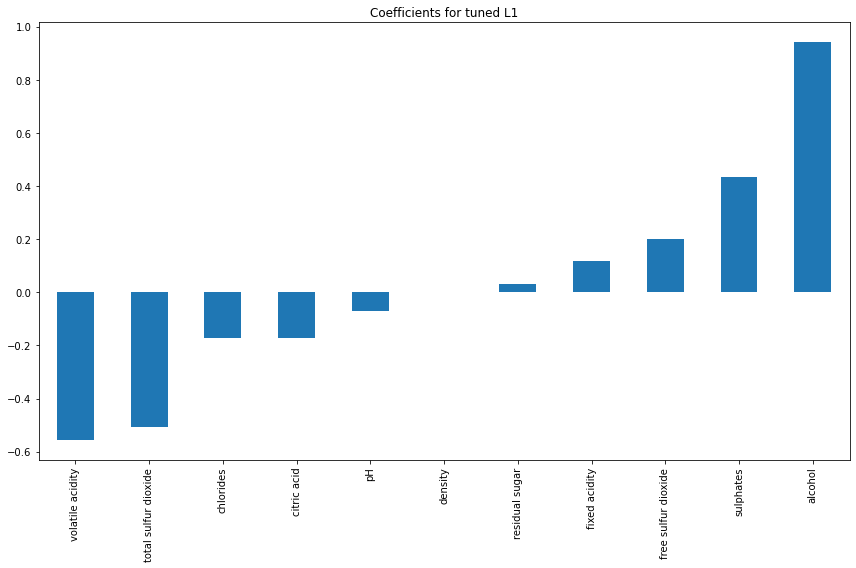

<Figure size 432x288 with 0 Axes>

In [46]:
## 16. Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
 
plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()

The feature `density` has been eliminated by L1 regularisation. Thus, we have effectively used L1 regularisation as a feature selection method which concluded that density should be eliminated, while all other feaures should be retained. 